# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** MOCHAMMAD RANDY SURYA BACHRI
- **Email:** Bachrirandy17@gmail.com
- **ID Dicoding:** randy_sb

## Menentukan Pertanyaan Bisnis

- Apa saja produk yang sering dibeli dan dari kategori apa?
- Bagaimana skor ulasan pelanggan (review score) untuk setiap kategori produk?
- Berapa rata-rata waktu pengiriman dari setiap seller ke pelanggan berdasarkan lokasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
product_translation = pd.read_csv("data/product_category_name_translation.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")

In [3]:
order_products = pd.merge(order_items, products, on="product_id", how="inner")

order_products = pd.merge(order_products, product_translation, 
                          on="product_category_name", 
                          how="left")

order_products["product_category_name_english"] = order_products["product_category_name_english"].fillna(order_products["product_category_name"])

orders_full = pd.merge(order_products, orders, on="order_id", how="inner")

orders_customers = pd.merge(orders_full, customers, on="customer_id", how="inner")

orders_reviews = pd.merge(orders_customers, order_reviews, on="order_id", how="left")

orders_sellers = pd.merge(orders_reviews, sellers, on="seller_id", how="inner")

final_data = pd.merge(orders_sellers, order_payments, on="order_id", how="left")

### Assessing Data

In [4]:
final_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,88303,itajai,SC,1.0,boleto,1.0,343.40
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,1206,sao paulo,SP,1.0,boleto,1.0,386.53
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,80610,curitiba,PR,1.0,credit_card,3.0,116.85
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,4733,sao paulo,SP,1.0,credit_card,3.0,64.71


In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name          116601 non-null  object 
 8   product_name_lenght            116601 non-null  float64
 9   product_description_lenght     116601 non-null  float64
 10  product_photos_qty             116601 non-null  float64
 11  product_weight_g               118290 non-null  float64
 12  product_length_cm             

In [6]:
# save final_data
final_data.to_csv('final_data.csv', index=False)

### Cleaning Data

In [7]:
final_data.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
product_category_name_english      1709
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0


In [8]:
columns_to_keep = ['review_comment_title', 'review_comment_message']
final_data = final_data.dropna(subset=[col for col in final_data.columns if col not in columns_to_keep])

In [9]:
final_data.isnull().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
product_category_name_english        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city            

In [10]:
final_data.shape

(113216, 40)

In [11]:
final_data.duplicated().sum()

0

**Insight:**
- Data null atau kosong terdapat pada beberapa kolom dalam dataset, seperti: order_id, product_id, seller_id, shipping_limit_date, price, product_category_name, product_name_length, product_description_length, customer_id, customer_city, customer_state, payment_sequential, payment_type, dan payment_value. 

- setelah melakukan pembersihan, data berkurang dari 118310 menjadi 113216. Saya sengaja tidak menghapus null di kolom review_comment_title dan review_comment_message karena banyak orang yang memang tidak mau memberikan komentar.

## Exploratory Data Analysis (EDA)

In [12]:
pd.concat([final_data.head(5), final_data.tail(5)])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,1.0,credit_card,3.0,218.04
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,88303,itajai,SC,1.0,boleto,1.0,343.40
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,1206,sao paulo,SP,1.0,boleto,1.0,386.53
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,80610,curitiba,PR,1.0,credit_card,3.0,116.85
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,4733,sao paulo,SP,1.0,credit_card,3.0,64.71
118309,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,cama_mesa_banho,47.0,511.0,...,NaN,2018-06-15 00:00:00,2018-06-17 21:27:09,14940,ibitinga,SP,1.0,credit_card,1.0,55.79


In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113216 non-null  object 
 1   order_item_id                  113216 non-null  int64  
 2   product_id                     113216 non-null  object 
 3   seller_id                      113216 non-null  object 
 4   shipping_limit_date            113216 non-null  object 
 5   price                          113216 non-null  float64
 6   freight_value                  113216 non-null  float64
 7   product_category_name          113216 non-null  object 
 8   product_name_lenght            113216 non-null  float64
 9   product_description_lenght     113216 non-null  float64
 10  product_photos_qty             113216 non-null  float64
 11  product_weight_g               113216 non-null  float64
 12  product_length_cm              1132

In [14]:
final_data.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000
mean,1.195052,119.869740,20.002353,48.804224,784.725710,2.206967,2106.346400,30.276922,16.598652,23.099412,35084.548703,4.082365,24522.449769,1.090809,2.943515,171.577925
std,0.687474,181.127416,15.710909,10.015776,650.300338,1.718318,3765.034692,16.144080,13.436740,11.734956,29867.207356,1.346005,27646.979640,0.686610,2.779137,264.218677
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1001.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,4.000000,6429.000000,1.000000,1.000000,60.850000
50%,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24315.000000,5.000000,13660.000000,1.000000,2.000000,107.970000
75%,1.000000,132.985000,21.190000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58844.250000,5.000000,28495.000000,1.000000,4.000000,189.160000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,5.000000,99730.000000,26.000000,24.000000,13664.080000


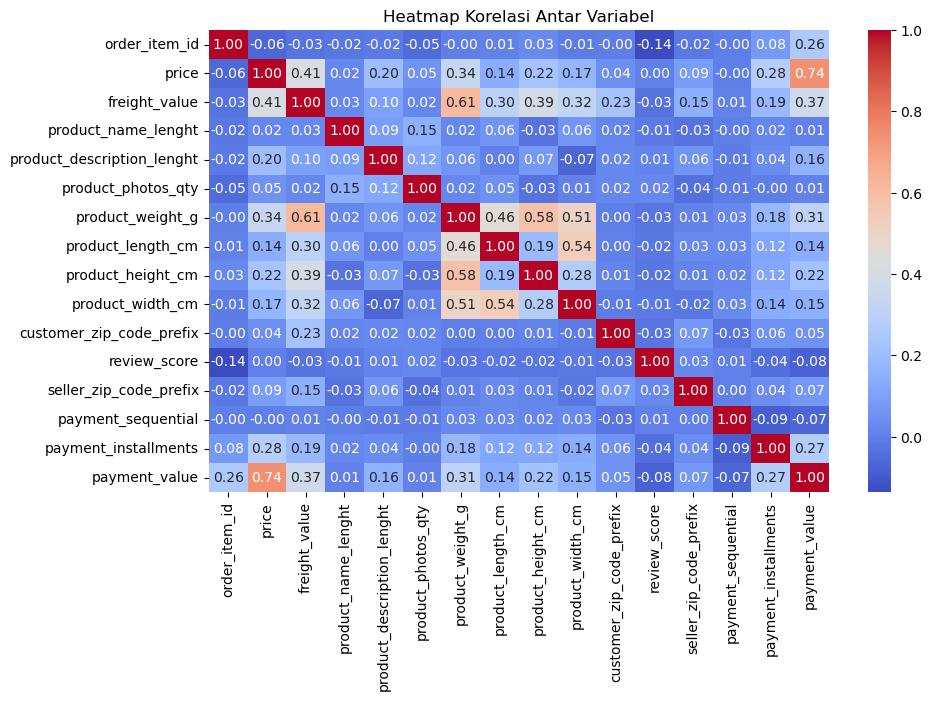

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


**Insight:**
- Harga Produk bervariasi luas (Rp0,85 – Rp6,73 juta), rata-rata Rp119 ribu, menunjukkan adanya produk murah hingga premium.
- Skor ulasan rata-rata 4,08 (mayoritas positif)
- Rata-rata berat 2,1 kg, namun ada produk hingga 40 kg, menunjukkan variasi ukuran signifikan.
- Biaya pengiriman berkorelasi dengan harga (0.41) dan berat produk (0.61), menunjukkan produk mahal dan berat cenderung memiliki biaya kirim lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja produk yang sering dibeli dan dari kategori apa?

C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\429857447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


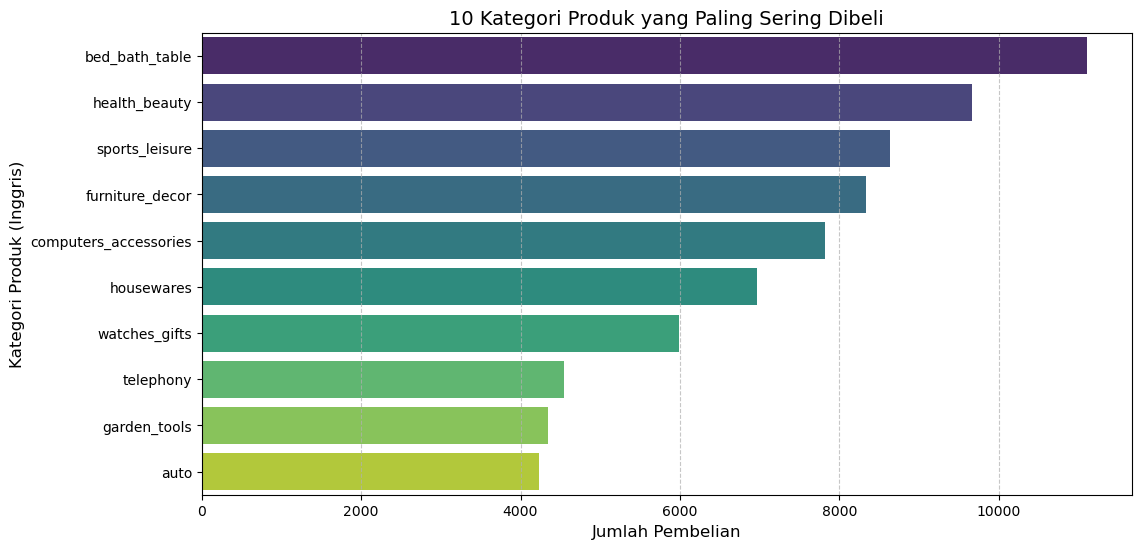

In [16]:
top_products = order_products["product_category_name_english"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Jumlah Pembelian", fontsize=12)
plt.ylabel("Kategori Produk (Inggris)", fontsize=12)
plt.title("10 Kategori Produk yang Paling Sering Dibeli", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Insight:**
- Kategori Terlaris: Produk kategori bed_bath_table paling banyak dibeli, menunjukkan kebutuhan tinggi untuk perlengkapan kamar tidur dan kamar mandi.

- Kesehatan & Kecantikan: health_beauty berada di posisi kedua, menandakan minat besar terhadap produk perawatan diri.

- Olahraga & Furnitur: sports_leisure dan furniture_decor juga populer, mencerminkan permintaan tinggi untuk gaya hidup sehat dan dekorasi rumah.

- Elektronik & Aksesori: computers_accessories cukup diminati, menunjukkan kebutuhan akan perangkat teknologi.

- Produk Lain: Kategori seperti housewares, watches_gifts, dan telephony juga memiliki pembelian tinggi, menunjukkan preferensi pelanggan yang beragam.

### Pertanyaan 2: Bagaimana skor ulasan pelanggan (review score) untuk setiap kategori produk?

In [17]:
# Hitung rata-rata review score untuk setiap kategori produk
review_scores = final_data.groupby("product_category_name_english")["review_score"].mean().reset_index()

# Urutkan berdasarkan rata-rata skor ulasan
review_scores = review_scores.sort_values(by="review_score", ascending=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\3556363361.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=top_10_highest, palette="Blues_r")


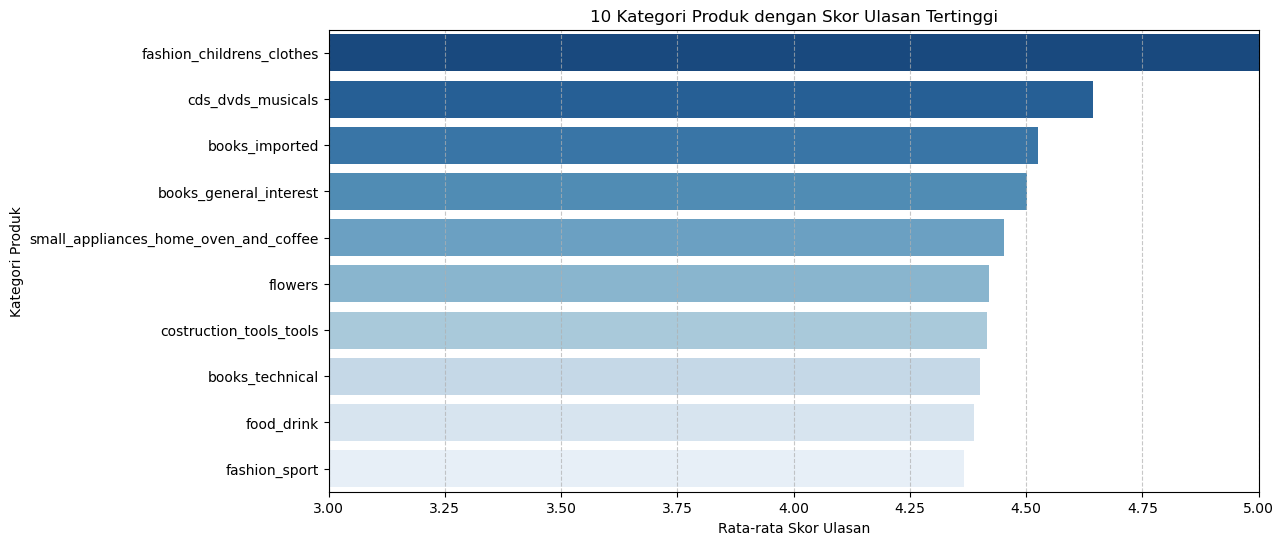

C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\3556363361.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=top_10_lowest, palette="Reds_r")


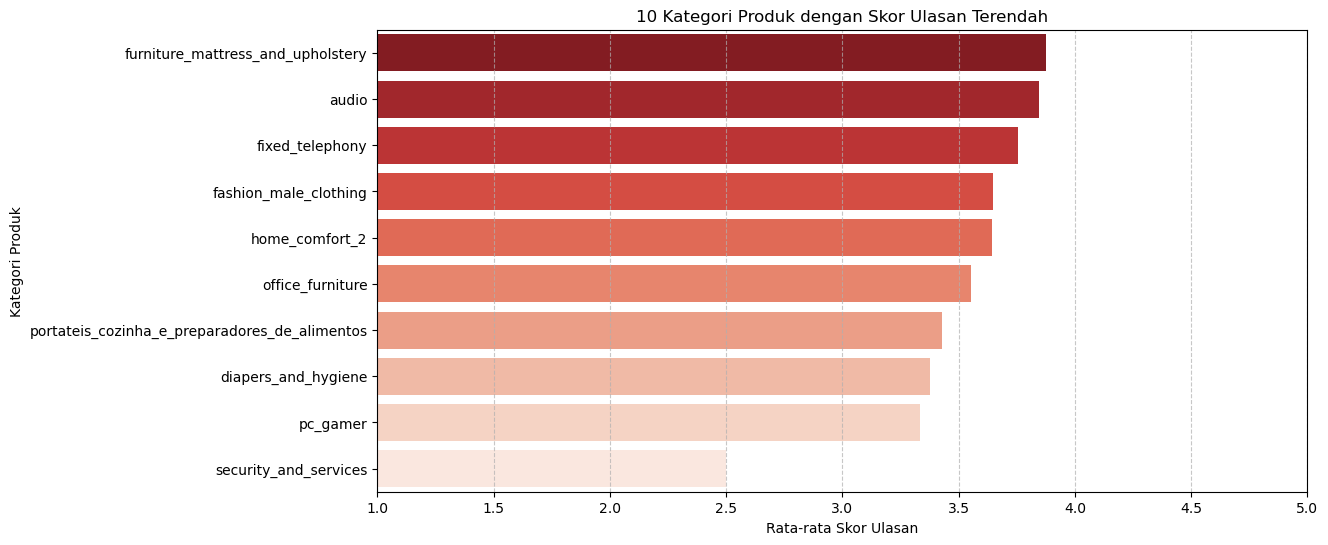

In [18]:
# Ambil 10 kategori dengan skor review tertinggi dan terendah
top_10_highest = review_scores.head(10)
top_10_lowest = review_scores.tail(10)

# Plot kategori dengan skor tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x="review_score", y="product_category_name_english", data=top_10_highest, palette="Blues_r")
plt.xlabel("Rata-rata Skor Ulasan")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk dengan Skor Ulasan Tertinggi")
plt.xlim(3, 5)  # Skor ulasan berkisar antara 1-5
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Plot kategori dengan skor terendah
plt.figure(figsize=(12, 6))
sns.barplot(x="review_score", y="product_category_name_english", data=top_10_lowest, palette="Reds_r")
plt.xlabel("Rata-rata Skor Ulasan")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk dengan Skor Ulasan Terendah")
plt.xlim(1, 5)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Insight:**
- Produk dengan Ulasan Tertinggi: Kategori fashion_childrens_clothes, cds_dvds_musicals, dan books_imported memiliki skor ulasan tertinggi, menunjukkan kepuasan pelanggan yang tinggi terhadap produk ini.

- Produk dengan Ulasan Terendah: Kategori furniture_mattress_and_upholstery, audio, dan fixed_telephony mendapat skor ulasan rendah, mungkin karena masalah kualitas, ketahanan, atau ekspektasi pelanggan yang tidak terpenuhi.

- Tren Umum: Produk yang berhubungan dengan hiburan dan buku cenderung mendapatkan ulasan positif, sementara produk elektronik dan perabotan memiliki ulasan lebih kritis.

### Pertanyaan 3: Berapa rata-rata waktu pengiriman dari setiap seller ke pelanggan berdasarkan lokasi?

In [19]:
# Konversi tanggal ke format datetime
final_data["order_purchase_timestamp"] = pd.to_datetime(final_data["order_purchase_timestamp"])
final_data["order_delivered_customer_date"] = pd.to_datetime(final_data["order_delivered_customer_date"])

# Hitung waktu pengiriman dalam hari
final_data["delivery_time"] = (final_data["order_delivered_customer_date"] - final_data["order_purchase_timestamp"]).dt.days

# Hapus nilai yang tidak valid (misalnya pesanan yang belum dikirim)
final_data = final_data.dropna(subset=["delivery_time"])

# Hitung rata-rata waktu pengiriman berdasarkan lokasi pelanggan
delivery_times = final_data.groupby("customer_state")["delivery_time"].mean().reset_index()
delivery_times = delivery_times.sort_values("delivery_time") 

C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\3518240685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["order_purchase_timestamp"] = pd.to_datetime(final_data["order_purchase_timestamp"])
C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\3518240685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["order_delivered_customer_date"] = pd.to_datetime(final_data["order_delivered_customer_date"])
C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\3518240685.py:6: SettingWithCopyWarni

C:\Users\ACER\AppData\Local\Temp\ipykernel_30140\2815031391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delivery_times, x="customer_state", y="delivery_time", palette="viridis")


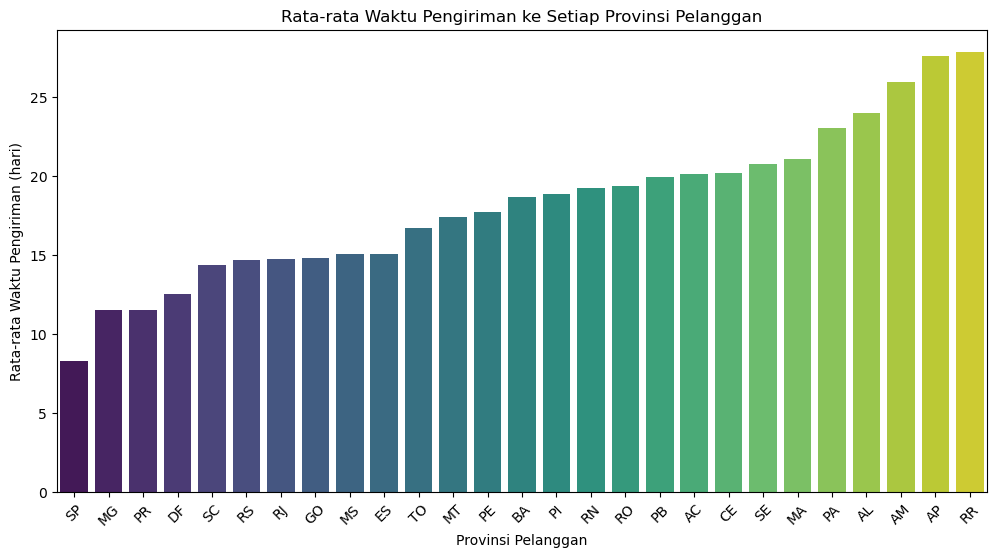

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=delivery_times, x="customer_state", y="delivery_time", palette="viridis")

# Tambahkan label
plt.title("Rata-rata Waktu Pengiriman ke Setiap Provinsi Pelanggan")
plt.xlabel("Provinsi Pelanggan")
plt.ylabel("Rata-rata Waktu Pengiriman (hari)")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Rata-rata waktu pengiriman bervariasi antar provinsi. Provinsi seperti São Paulo (SP) memiliki waktu pengiriman tercepat, sedangkan Roraima (RR) memiliki waktu pengiriman paling lama.

## Conclusion

- Pertanyaan 1:
Produk kategori bed_bath_table menjadi yang paling laris, menunjukkan kebutuhan tinggi untuk perlengkapan rumah tangga. Minat terhadap health_beauty menandakan pentingnya perawatan diri bagi konsumen. Popularitas sports_leisure dan furniture_decor mencerminkan tren gaya hidup sehat dan dekorasi rumah. Permintaan tinggi pada computers_accessories menunjukkan ketergantungan konsumen pada perangkat teknologi. Selain itu, kategori seperti housewares, watches_gifts, dan telephony menunjukkan preferensi pelanggan yang beragam dalam berbelanja.

- Pertanyaan 2:
Produk seperti fashion_childrens_clothes, cds_dvds_musicals, dan books_imported mendapatkan ulasan tertinggi, menunjukkan tingkat kepuasan pelanggan yang tinggi. Sebaliknya, kategori furniture_mattress_and_upholstery, audio, dan fixed_telephony memiliki skor ulasan rendah, kemungkinan karena masalah kualitas atau ekspektasi yang tidak terpenuhi. Secara umum, produk terkait hiburan dan buku lebih disukai pelanggan, sedangkan elektronik dan perabotan cenderung mendapat ulasan lebih kritis.

- Pernyataan 3:
Waktu pengiriman pesanan berbeda-beda di setiap provinsi. São Paulo (SP) memiliki waktu pengiriman tercepat, kemungkinan karena infrastruktur logistik yang lebih baik dan kedekatan dengan pusat distribusi. Sebaliknya, Roraima (RR) memiliki waktu pengiriman paling lama, yang mungkin disebabkan oleh jarak geografis yang lebih jauh dan keterbatasan akses transportasi. Hal ini menunjukkan bahwa faktor lokasi berpengaruh signifikan terhadap efisiensi pengiriman.